<a href="https://colab.research.google.com/github/edoucet-AI/project_1_eda/blob/main/project_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import the required libraries and dependencies
import pandas as pd
import datetime as dt
from prophet import Prophet
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# run this cell and give permissions so you are able to access the original csv data file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Creating File path
file_path = "/content/drive/MyDrive/Group Project 1/Resources/mental_health_dataset.csv"
#uncleaned dataset for exploration
df_mental_health_uncleaned = pd.read_csv(file_path)


# The Dataset Used:


---

[link to kaggle page here ](https://www.kaggle.com/datasets/bhavikjikadara/mental-health-dataset)

#Data Exploration:

---

Analyzed Data:
Determined the column names, datatypes, identified null values, and unique values.

---
Describe Function: Determine if there is any statistics




In [4]:
df_mental_health_uncleaned.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [5]:
# Print out the columns of the dataframe
print(df_mental_health_uncleaned.columns)

Index(['Timestamp', 'Gender', 'Country', 'Occupation', 'self_employed',
       'family_history', 'treatment', 'Days_Indoors', 'Growing_Stress',
       'Changes_Habits', 'Mental_Health_History', 'Mood_Swings',
       'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
       'mental_health_interview', 'care_options'],
      dtype='object')


In [6]:
# Print out the info for this dataframe
df_mental_health_uncleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [7]:
# Check for missing value in each column of the dataframe
df_mental_health_uncleaned.isna().sum()

,0
Timestamp,0
Gender,0
Country,0
Occupation,0
self_employed,5202
family_history,0
treatment,0
Days_Indoors,0
Growing_Stress,0
Changes_Habits,0


In [8]:
# Checking for unique values in columns
# Loop through each column and print unique values
for col in df_mental_health_uncleaned.columns:
        print(f"Unique values in column '{col}':")
        print(df_mental_health_uncleaned[col].unique())
        print('-' * 50)  # Separator for readability

Unique values in column 'Timestamp':
['8/27/2014 11:29' '8/27/2014 11:31' '8/27/2014 11:32' '8/27/2014 11:37'
 '8/27/2014 11:43' '8/27/2014 11:49' '8/27/2014 11:51' '8/27/2014 11:52'
 '8/27/2014 12:18' '8/27/2014 12:37' '8/27/2014 12:39' '8/27/2014 12:40'
 '8/27/2014 12:49' '8/27/2014 12:50' '8/27/2014 12:51' '8/27/2014 12:53'
 '8/27/2014 12:55' '8/27/2014 12:57' '8/27/2014 13:06' '8/27/2014 13:31'
 '8/27/2014 13:47' '8/27/2014 13:49' '8/27/2014 13:55' '8/27/2014 14:11'
 '8/27/2014 14:13' '8/27/2014 14:16' '8/27/2014 14:19' '8/27/2014 14:27'
 '8/27/2014 14:31' '8/27/2014 14:52' '8/27/2014 15:22' '8/27/2014 15:24'
 '8/27/2014 15:29' '8/27/2014 15:34' '8/27/2014 15:35' '8/27/2014 15:36'
 '8/27/2014 16:02' '8/27/2014 16:14' '8/27/2014 16:19' '8/27/2014 16:21'
 '8/27/2014 16:25' '8/27/2014 16:27' '8/27/2014 16:35' '8/27/2014 16:42'
 '8/27/2014 17:08' '8/27/2014 17:32' '8/27/2014 17:37' '8/27/2014 17:48'
 '8/27/2014 17:56' '8/27/2014 18:02' '8/27/2014 18:59' '8/27/2014 19:05'
 '8/27/2014 20

In [9]:
# Use Describe for statistics
df_mental_health_uncleaned.describe()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,292364,292364,292364,292364,287162,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364
unique,580,2,35,5,2,2,2,5,3,3,3,3,2,3,3,3,3
top,8/27/2014 11:43,Male,United States,Housewife,No,No,Yes,1-14 days,Maybe,Yes,No,Medium,No,No,Maybe,No,No
freq,2384,239850,171308,66351,257994,176832,147606,63548,99985,109523,104018,101064,154328,105843,103393,232166,118886


In [10]:
df_mental_health_uncleaned.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


# Data Cleaning:

Data cleaning was handled in a separte notebook called cleaning_data.ipynb

---
Handle Missing Values:
Decide whether to remove, fill, or leave missing values.

---











In [11]:
# Creating File path
file_path = "/content/drive/MyDrive/Group Project 1/Resources/cleaned_mental_health_dataset.csv"
#cleaned dataset for exploration
df_mental_health = pd.read_csv(file_path)

In [12]:

# Review the DataFrame head of the df
df_mental_health.head()


,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,2014-08-27 11:37:00,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
1,2014-08-27 11:43:00,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
2,2014-08-27 11:49:00,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure
3,2014-08-27 11:51:00,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
4,2014-08-27 11:52:00,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No


In [13]:
#tail of the df
df_mental_health.tail()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
287157,2015-07-27 23:25:00,Male,United States,Business,Yes,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,Maybe,Not sure
287158,2015-08-17 09:38:00,Male,South Africa,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes
287159,2015-08-25 19:59:00,Male,United States,Business,No,Yes,No,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,No
287160,2015-09-26 01:07:00,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes
287161,2016-02-01 23:04:00,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes


#Data Analysis:

---


Correlation Analysis:
Using correlation matrices to find relationships between variables.
Grouping data based on demographics or other criteria to find patterns.

#Questions

---
Which occupation has the higher rate of seeking mental health treatment?
Related Columns: Occupation, treatment

---




Is there a correlation between occupation type and the likelihood of experiencing mood swings?
Related Columns: Occupation, Self_employed, Mood_Swings



---


Correlation between spending too much time indoors and conditions of mental health?
Related Columns: Days_indoors, et al



#Which occupation has the higher rate of seeking mental health treatment?
Related Columns: Occupation, treatment

Step 1: Creating the Data Frame that will be used for the question number one.

In [14]:
#creating a new data frame with the following columns (Occupation,treatment)
df_mental_health_emd = df_mental_health[['Occupation','treatment']]
df_mental_health_emd.head()

,Occupation,treatment
0,Corporate,Yes
1,Corporate,Yes
2,Corporate,Yes
3,Corporate,Yes
4,Corporate,No


Step 2 : Analyzing the relationship between Occupation and Seeking Mental Health Treatment.

In [15]:
# Grouping Treatment column by Occupation column with value count
df_treatment_emd = df_mental_health_emd.groupby('Occupation',as_index=False)['treatment'].value_counts()
df_treatment_emd.head()
# Rename the column Count as treatment_num
df_treatment_emd = df_treatment_emd.rename(columns={'count':'treatment_num'})
display(df_treatment_emd.head())
display(df_treatment_emd.tail())

,Occupation,treatment,treatment_num
0,Business,Yes,24945
1,Business,No,24307
2,Corporate,No,30278
3,Corporate,Yes,29879
4,Housewife,Yes,32785


,Occupation,treatment,treatment_num
5,Housewife,No,32388
6,Others,Yes,26355
7,Others,No,25538
8,Student,Yes,30780
9,Student,No,29907


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Business'),
  Text(1, 0, 'Corporate'),
  Text(2, 0, 'Housewife'),
  Text(3, 0, 'Others'),
  Text(4, 0, 'Student')])

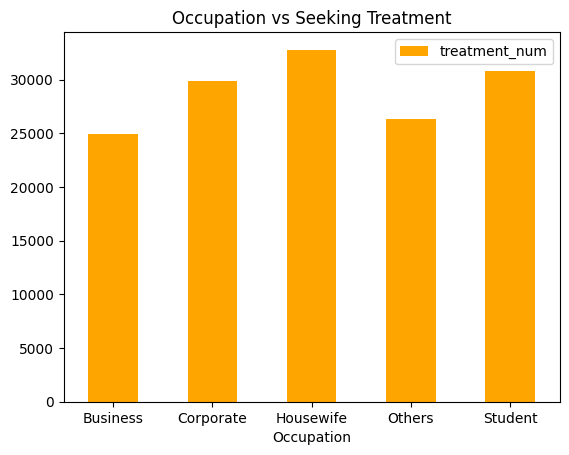

In [16]:
# Filter to only display occupations where the treatment value is equal to Yes
df_treatment_emd_yes = df_treatment_emd[df_treatment_emd['treatment'] == 'Yes']
df_treatment_emd_yes.head()

# Plot the data using a bar chart with occupation as the x axis and treatment as the y axis
df_treatment_emd_yes.plot(kind='bar', x='Occupation', y='treatment_num',color='orange',title='Occupation vs Seeking Treatment')
plt.xticks(rotation=0)

Summary Step 2: Of all the occupations listed in this dataset, the occupation of Housewife had the highest number of instances of seeking mental health treatment of all the occupations. The occupation of Student was the 2nd highest occupation that seeked mental health treatment.

Step 3: Analyze the probablity of seeking mental health treatment as a Housewife.  

In [17]:
# Grouping Treatment column by occupation column where column value is Housewife with value count
df_treatment_housewife_emd = df_mental_health_emd[df_mental_health_emd['Occupation'] == 'Housewife'].groupby('Occupation',as_index=False)['treatment'].value_counts()

# Rename the column Count as occupation_treatment_num
df_treatment_housewife_emd = df_treatment_housewife_emd.rename(columns={'count':'occupation_treatment_num'})
df_treatment_housewife_emd

,Occupation,treatment,occupation_treatment_num
0,Housewife,Yes,32785
1,Housewife,No,32388


In [18]:
# Map the treatment column string values to numerical values where Yes = 1 and No = 0
df_treatment_housewife_emd['treatment']=df_treatment_housewife_emd['treatment'].map({'Yes':1,'No':0})
df_treatment_housewife_emd.head()

,Occupation,treatment,occupation_treatment_num
0,Housewife,1,32785
1,Housewife,0,32388


([<matplotlib.axis.XTick at 0x7cc92bcb2680>,
 [Text(0, 0, 'Seeked Treatment'), Text(1, 0, 'Did Not Seek Treatment')])

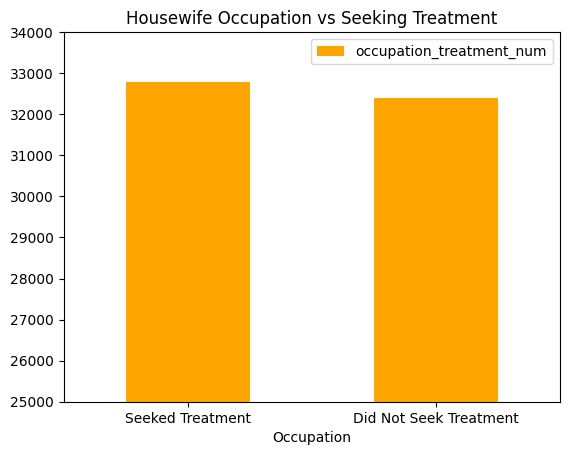

In [19]:
# Plot treatment versus Housewife occupation on a bar chart for those who did and didnt seek treatment
df_treatment_housewife_emd.plot(kind='bar',x='Occupation',y='occupation_treatment_num',color='orange',title='Housewife Occupation vs Seeking Treatment')
plt.ylim(25000,34000)
plt.xticks(plt.xticks()[0],labels=['Seeked Treatment', 'Did Not Seek Treatment'],rotation=0)

Summary Step 3: The number of Housewives who are seeking treatment is nearly the same as the number of Housewives who are not seeking treatment.  Housewives who are seeking treatment is roughly 1.23% higher than Housewives who do not seek treatment. Of all Housewives in this dataset 50.3045% seeked mental health treatment of some kind.  

Step 4: Analyze the relationship for all occupation for those seek treatment and do not seek treatment.

In [20]:
# Grouping Treatment column by occupation column where column value is Housewife with value count
df_treatment_all_emd = df_mental_health_emd.groupby('Occupation',as_index=False)['treatment'].value_counts()

# Rename the column Count as occupation_treatment_num
df_treatment_all_emd = df_treatment_all_emd.rename(columns={'count':'occupation_treatment_num'})
df_treatment_all_emd

,Occupation,treatment,occupation_treatment_num
0,Business,Yes,24945
1,Business,No,24307
2,Corporate,No,30278
3,Corporate,Yes,29879
4,Housewife,Yes,32785
5,Housewife,No,32388
6,Others,Yes,26355
7,Others,No,25538
8,Student,Yes,30780
9,Student,No,29907


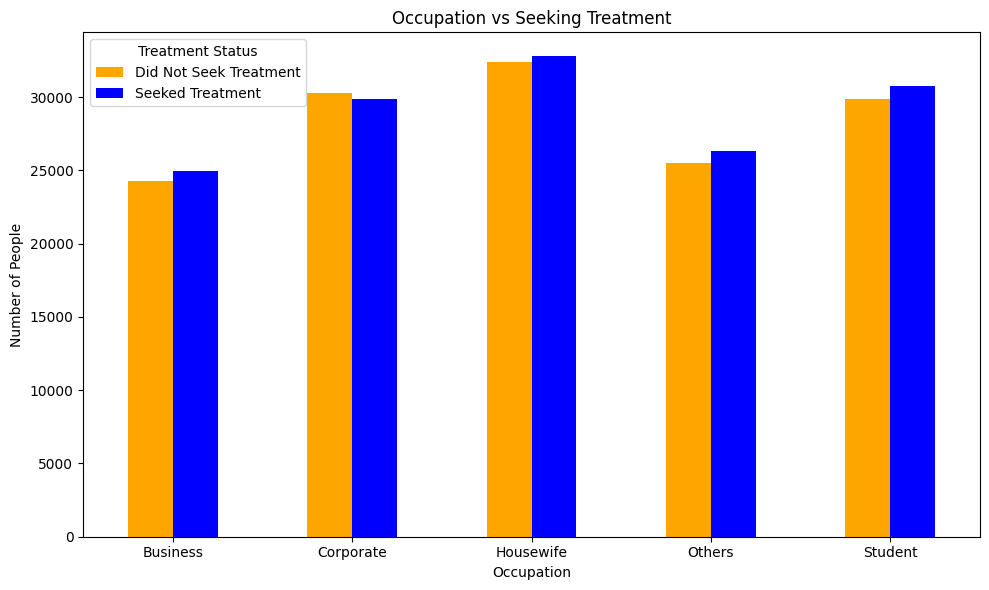

In [21]:
# Begin
# Set the index to 'occupation' and 'treatment', then unstack 'treatment'
df_unstacked = df_treatment_all_emd.set_index(['Occupation', 'treatment'])['occupation_treatment_num'].unstack()

# Plot the unstacked DataFrame
df_unstacked.plot(kind="bar", figsize=(10, 6), color=["orange", "blue"])

# Add labels and title
plt.xlabel("Occupation")
plt.ylabel("Number of People")
plt.title("Occupation vs Seeking Treatment")

# Display the legend
plt.legend(title="Treatment Status", labels=["Did Not Seek Treatment", "Seeked Treatment"])

#rotate the x labels to 0
plt.xticks(rotation=0)
# Show the plot
plt.tight_layout()
plt.show()

#End

Summary Step 4: With the exception of the Corporate occupation.  All other occupations had a higher number of people that seeked treatment compared to those that didn't for the same occupation.  

###Conclusion: The occupation of Housewife had the highest instances of seeking mental health treatment of all the occupations in our dataset.  As a Housewife you have a probability of 50.3045% of seeking treatment. While each occupation tended to trend towards higher instances of people seeking treatment than not the Corporate occupation was an outlier because more people in the Corporate occupation did not seek treatment.  In conclusion the occupation with the lowest level of people seeking treatment is the Business occupation which is  23.91% lower than that of a Housewife.     

#Is there a relationship between occupation type and loss of interest in work?
Related Columns: Occupation, Work_Interest




#Is there a correlation between occupation type and the likelihood of experiencing mood swings?
Related Columns: Occupation, Mood_Swings


### Step 1: Creating the Data Frame that will be udes for the question number three.

In [22]:
#creating a new data frame with the following columns (Occupation,self_employed,Growing_Stress,Mood_Swings)
df_mental_health_asm = df_mental_health[['Occupation','self_employed','Mood_Swings']]
df_mental_health_asm.head()

,Occupation,self_employed,Mood_Swings
0,Corporate,No,Medium
1,Corporate,No,Medium
2,Corporate,No,Medium
3,Corporate,No,Medium
4,Corporate,No,Medium


-----------------------------------------------------------------------------------------------------------------------------------------
### Step 2 : Analysing the relationship between Mood Swimg and Occupation.


In [23]:
# Grouping Mood_Swings column by Occupation column with value count
df_Mood_swing_asm = df_mental_health_asm.groupby('Occupation',as_index=False)['Mood_Swings'].value_counts()
df_Mood_swing_asm.head()
# Rename the column Count as mood_swing_num
df_Mood_swing_asm = df_Mood_swing_asm.rename(columns={'count':'mood_swing_num'})
display(df_Mood_swing_asm.head())
display(df_Mood_swing_asm.tail())


,Occupation,Mood_Swings,mood_swing_num
0,Business,Medium,20377
1,Business,Low,15522
2,Business,High,13353
3,Corporate,Medium,27017
4,Corporate,Low,17367


,Occupation,Mood_Swings,mood_swing_num
10,Others,High,16127
11,Others,Medium,14799
12,Student,High,26530
13,Student,Low,18281
14,Student,Medium,15876


In [24]:
# Loc to only hight mood swing
df_high_mood_swings_asm = df_Mood_swing_asm.loc[df_Mood_swing_asm['Mood_Swings'] == 'High']
df_high_mood_swings_asm = df_high_mood_swings_asm.set_index('Occupation')
df_high_mood_swings_asm.head()

,Mood_Swings,mood_swing_num
Occupation,,
Business,High,13353
Corporate,High,15773
Housewife,High,18045
Others,High,16127
Student,High,26530


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Business'),
  Text(1, 0, 'Corporate'),
  Text(2, 0, 'Housewife'),
  Text(3, 0, 'Others'),
  Text(4, 0, 'Student')])

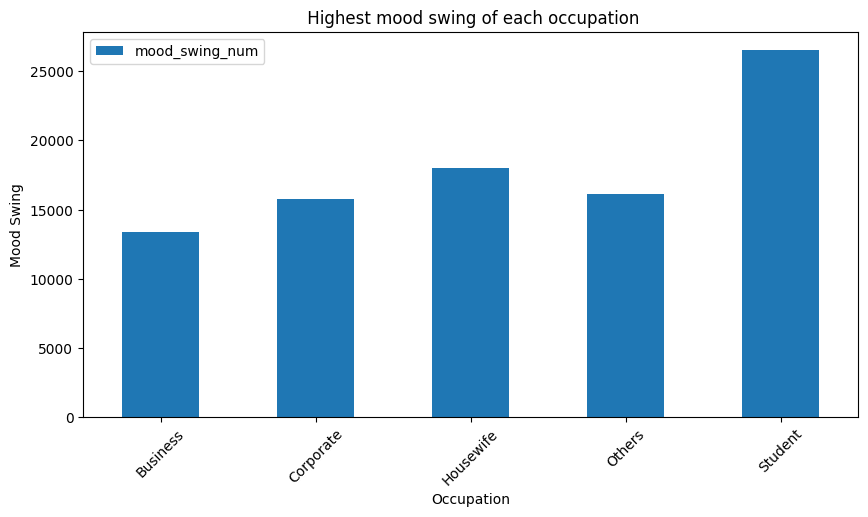

In [25]:
# Plot the highest mood swing of each occupation
df_high_mood_swings_asm.plot(xlabel='Occupation',ylabel='Mood Swing',\
                       figsize=(10,5),kind='bar'\
                        ,title=' Highest mood swing of each occupation')
plt.xticks(rotation=45)

In [26]:
# Reset index
df_high_mood_swings_asm=df_high_mood_swings_asm.reset_index()

In [27]:
# Filtering the values Business and Corporate
df_high_mood_swings_asm= df_high_mood_swings_asm.loc[(df_high_mood_swings_asm['Occupation']=='Business') | (df_high_mood_swings_asm['Occupation'] =='Corporate')]
# Set Occupation as index
df_high_mood_swings_asm = df_high_mood_swings_asm.set_index('Occupation')

(array([0, 1]), [Text(0, 0, 'Business'), Text(1, 0, 'Corporate')])

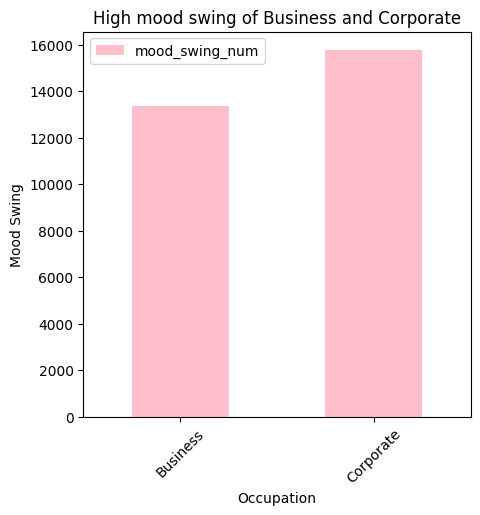

In [28]:
# Plotting the bar chart
df_high_mood_swings_asm.plot(kind='bar',xlabel='Occupation',ylabel='Mood Swing',figsize=(5,5) ,color='pink')
plt.title('High mood swing of Business and Corporate')
plt.xticks(rotation=45)

### Summary step 2 :

Based on the first plot,the people who has the highest mood swing of all occupations are the students, the second occupation is housewife and then it comes others which is nearly the same as Corporate, others it may refer to unemployed people, the last one is Business occupation.

The second bar plot compares the mood swings across two occupations Business and Corporate, it is clear that Corporate occupation show higher mood swing values compared to business occupations. this indicate that Corporate jobs are more emotionlly draining or have more instance of mood swings than Business jobs.

  

--------------------------------------------------------------------------------
### Step 3 : Analyzing the relationship between Mood swing and self employed.

In [29]:
# Grouping Mood_Swings column by self_employed column with value count
df_Mood_swing_self_employed_asm = df_mental_health_asm.groupby(['self_employed'],as_index=False)['Mood_Swings'].value_counts()
df_Mood_swing_self_employed_asm = df_Mood_swing_self_employed_asm.rename(columns={'count':'mood_swing_self_employed_num'})
df_Mood_swing_self_employed_asm

,self_employed,Mood_Swings,mood_swing_self_employed_num
0,No,Medium,89152
1,No,Low,88076
2,No,High,80766
3,Yes,Medium,10120
4,Yes,Low,9986
5,Yes,High,9062


In [30]:
# Creating numerical column for self employed column with map function
df_Mood_swing_self_employed_asm['self_employed']=df_Mood_swing_self_employed_asm['self_employed'].map({'Yes':1,'No':0})
df_Mood_swing_self_employed_asm

,self_employed,Mood_Swings,mood_swing_self_employed_num
0,0,Medium,89152
1,0,Low,88076
2,0,High,80766
3,1,Medium,10120
4,1,Low,9986
5,1,High,9062


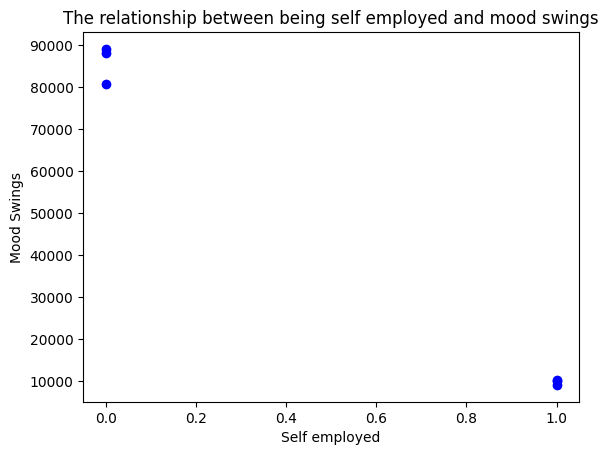

In [31]:
# Plot mood swing versus self employed on a scatterplot
plt.scatter(df_Mood_swing_self_employed_asm['self_employed'],df_Mood_swing_self_employed_asm['mood_swing_self_employed_num'], color='blue')
plt.xlabel('Self employed')
plt.ylabel('Mood Swings')
plt.title('The relationship between being self employed and mood swings')
plt.show()

In [32]:
# The correlation between two variables self_empoyed and mood_swing_self_employed_num
mood_swing_correlation_asm = df_Mood_swing_self_employed_asm[['self_employed' , 'mood_swing_self_employed_num']].corr().round(3)
display(mood_swing_correlation_asm)

,self_employed,mood_swing_self_employed_num
self_employed,1.000,-0.998
mood_swing_self_employed_num,-0.998,1.000


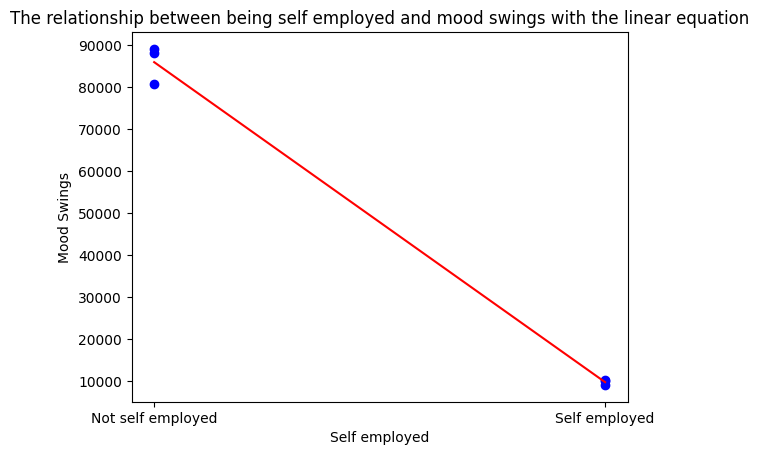

In [33]:
# Adding the linear regression equation and line to plot
x_values_asm = df_Mood_swing_self_employed_asm['self_employed']
y_values_asm = df_Mood_swing_self_employed_asm['mood_swing_self_employed_num']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_asm, y_values_asm)
regress_values_asm = x_values_asm * slope + intercept
line_eq_asm = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_asm,y_values_asm,color='blue')
plt.plot(x_values_asm,regress_values_asm,"r-")
plt.annotate(line_eq_asm,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Self employed')
plt.ylabel('Mood Swings')
plt.xticks([0,1],['Not self employed','Self employed'])
plt.title('The relationship between being self employed and mood swings with the linear equation')
plt.show()

### Summary step 3 :
The pearson coefficient is -0.996, the result is between -1 and 0 , it is
very close to -1 which is very strong negative correlation.
The scatter plot shows the relationship between mood swings and being self employed, the red line shows linear regression, the line is decreasing which is equivalent to the pearson coefficient is negative.
This means that as self employed values increases, the mood swing  decreases, the negative sign indicate an inverse relationship
between the two variables.

### Conclusion :
The Most Emotionally Draining jobs are Corporate jobs and the none self employed people, Corporate jobs often come with high levels of responsibility, long working hours, intense competition, and demanding deadlines. These factors can contribute to increased stress levels among employees.Also none self employed jobs are very stressful, they come with unfair treatment,working conditions, Not having control over how you do your work can be stressful and tight deadlines.The more likely someone is to be self employed, the lower their mood swings are.

-------------------------------------------------------------------------------------------------------------

#Are people in certain occupations more likely to report mental health struggles and seek treatment?
Related Columns: Occupation, treatment, Mood_Swings

# Does the type of occupation correlate with both mood swings and a loss of interest in work?
Related Columns: Occupation, Mood_Swings, Work_Interest

Question regarding times indoors

In [34]:
#setting up df for Jaylen
df_mental_health_jay = df_mental_health.copy()
#convert timestamp to datetime
df_mental_health_jay['Timestamp'] = pd.to_datetime(df_mental_health_jay['Timestamp'])
#set timestamp as index
df_mental_health_jay.set_index('Timestamp', inplace=True)

In [35]:
df_mental_health_jay.isna().sum()

,0
Gender,0
Country,0
Occupation,0
self_employed,0
family_history,0
treatment,0
Days_Indoors,0
Growing_Stress,0
Changes_Habits,0
Mental_Health_History,0


In [36]:
# List of columns to exclude
exclude_columns = ['Gender', 'Country']

# Loop through each column and print unique values
for col in df_mental_health_jay.columns:
    if col not in exclude_columns:
        print(f"Unique values in column '{col}':")
        print(df_mental_health_jay[col].unique())
        print('-' * 50)  # Separator for readability

Unique values in column 'Occupation':
['Corporate' 'Student' 'Business' 'Housewife' 'Others']
--------------------------------------------------
Unique values in column 'self_employed':
['No' 'Yes']
--------------------------------------------------
Unique values in column 'family_history':
['Yes' 'No']
--------------------------------------------------
Unique values in column 'treatment':
['Yes' 'No']
--------------------------------------------------
Unique values in column 'Days_Indoors':
['1-14 days' 'Go out Every day' 'More than 2 months' '15-30 days'
 '31-60 days']
--------------------------------------------------
Unique values in column 'Growing_Stress':
['Yes' 'No' 'Maybe']
--------------------------------------------------
Unique values in column 'Changes_Habits':
['No' 'Yes' 'Maybe']
--------------------------------------------------
Unique values in column 'Mental_Health_History':
['Yes' 'No' 'Maybe']
--------------------------------------------------
Unique values in colum

In [37]:
# Define the mapping dictionary
mapping_dict = {'Yes': 1, 'No': 0, 'Maybe': 0.5, 'Not sure': 0.5}

# List of columns to map
columns_to_map = [
    'self_employed',
    'family_history',
    'treatment',
    'Growing_Stress',
    'Changes_Habits',
    'Mental_Health_History',
    'Work_Interest',
    'Social_Weakness',
    'mental_health_interview',
    'care_options'
]

# Apply the mapping and create new numeric columns
for col in columns_to_map:
    new_col_name = f"{col}_numeric"
    df_mental_health_jay[new_col_name] = df_mental_health_jay[col].map(mapping_dict)

# Map 'Coping_Struggles' and create a new numeric column
df_mental_health_jay['Coping_Struggles_numeric'] = df_mental_health_jay['Coping_Struggles'].map({'Yes': 1, 'No': 0})

# Define the mapping for 'Mood_Swings'
mood_swings_mapping = {'Low': 1, 'Medium': 2, 'High': 3}

# Apply the mapping and create a new numeric column
df_mental_health_jay['Mood_Swings_numeric'] = df_mental_health_jay['Mood_Swings'].map(mood_swings_mapping)

# Mapping for 'Days_Indoors'
days_indoors_mapping = {
    'Go out Every day': 0,
    '1-14 days': 7,
    '15-30 days': 22,
    '31-60 days': 45,
    'More than 2 months': 75
}

# Apply the mapping and create a new numeric column
df_mental_health_jay['Days_Indoors_numeric'] = df_mental_health_jay['Days_Indoors'].map(days_indoors_mapping)



In [38]:
# List of all new numeric columns
numeric_columns = [f"{col}_numeric" for col in columns_to_map] + ['Coping_Struggles_numeric', 'Mood_Swings_numeric', 'Days_Indoors_numeric']

# Verify the unique values
for col in numeric_columns:
    print(f"Unique values in '{col}': {df_mental_health_jay[col].unique()}")


Unique values in 'self_employed_numeric': [0. 1.]
Unique values in 'family_history_numeric': [1. 0.]
Unique values in 'treatment_numeric': [1. 0.]
Unique values in 'Growing_Stress_numeric': [1.  0.  0.5]
Unique values in 'Changes_Habits_numeric': [0.  1.  0.5]
Unique values in 'Mental_Health_History_numeric': [1.  0.  0.5]
Unique values in 'Work_Interest_numeric': [0.  0.5 1. ]
Unique values in 'Social_Weakness_numeric': [1.  0.  0.5]
Unique values in 'mental_health_interview_numeric': [0.5 0.  1. ]
Unique values in 'care_options_numeric': [1.  0.5 0. ]
Unique values in 'Coping_Struggles_numeric': [0 1]
Unique values in 'Mood_Swings_numeric': [2 1 3]
Unique values in 'Days_Indoors_numeric': [ 7  0 75 22 45]


In [39]:
# Check for missing values in new numeric columns
missing_values = df_mental_health_jay[numeric_columns].isnull().sum()
print("Missing values in new numeric columns:")
print(missing_values)


Missing values in new numeric columns:
self_employed_numeric              0
family_history_numeric             0
treatment_numeric                  0
Growing_Stress_numeric             0
Changes_Habits_numeric             0
Mental_Health_History_numeric      0
Work_Interest_numeric              0
Social_Weakness_numeric            0
mental_health_interview_numeric    0
care_options_numeric               0
Coping_Struggles_numeric           0
Mood_Swings_numeric                0
Days_Indoors_numeric               0
dtype: int64


In [40]:
# Compute the correlation matrix using numeric columns
correlation_matrix = df_mental_health_jay[numeric_columns].corr()

# Get correlations with 'Days_Indoors_numeric'
days_indoors_corr = correlation_matrix['Days_Indoors_numeric'].sort_values(ascending=False)
print("Correlation of 'Days_Indoors_numeric' with other variables:")
print(days_indoors_corr)


Correlation of 'Days_Indoors_numeric' with other variables:
Days_Indoors_numeric               1.000000
Growing_Stress_numeric             0.037750
Coping_Struggles_numeric           0.023845
Mental_Health_History_numeric      0.015024
Mood_Swings_numeric                0.008347
family_history_numeric             0.001791
treatment_numeric                  0.001547
care_options_numeric               0.000970
self_employed_numeric             -0.000593
mental_health_interview_numeric   -0.001046
Changes_Habits_numeric            -0.003337
Social_Weakness_numeric           -0.030708
Work_Interest_numeric             -0.043527
Name: Days_Indoors_numeric, dtype: float64


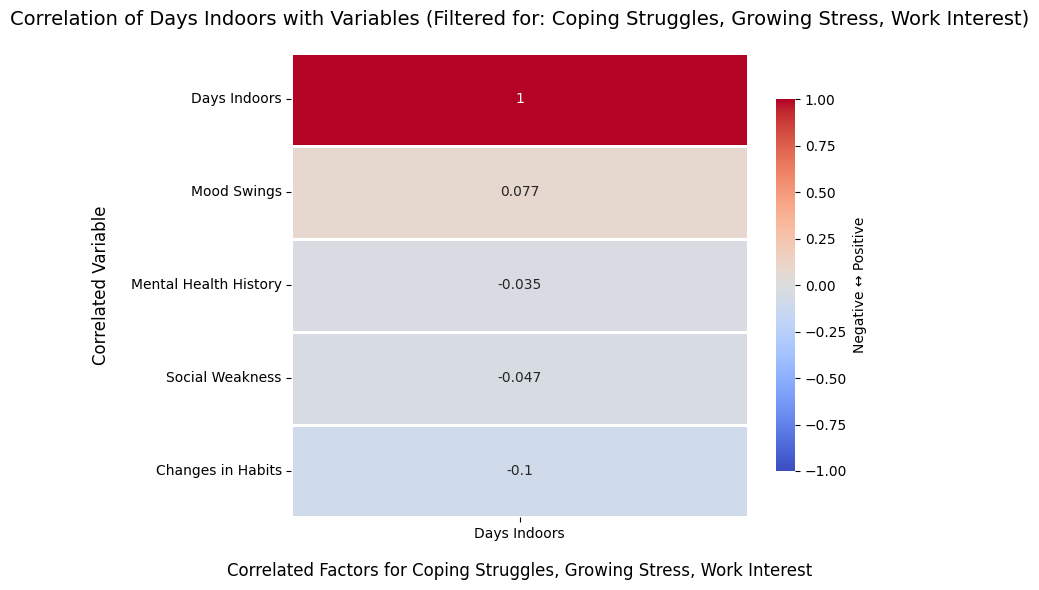

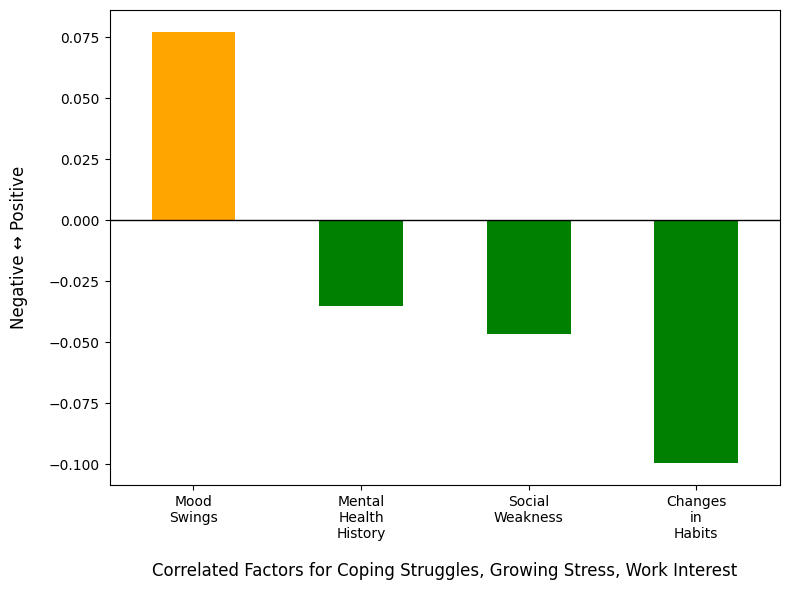

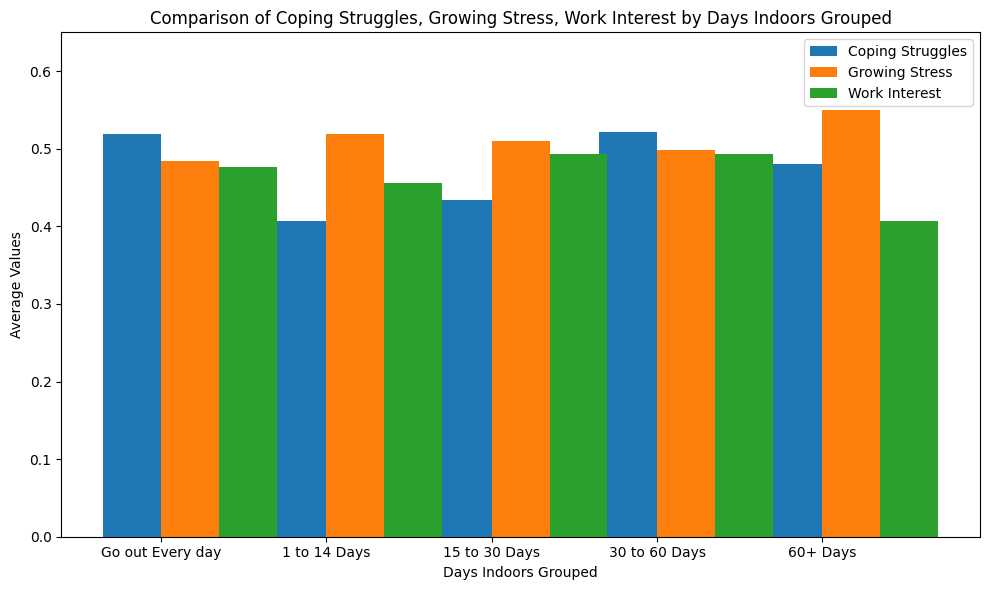


**Dynamic Explanation:**
This heatmap and bar chart show how time spent indoors correlates with other factors for individuals who meet the following conditions: Coping Struggles, Growing Stress, Work Interest
Correlations greater than or equal to 0.02 (positive or negative) are shown.

- **Mood Swings** has a **weak positive correlation** of 0.08 with Days Indoors.
  *Interpretation*: There is a slight tendency for those who spend more time indoors and have these conditions to have increased Mood Swings.

- **Mental Health History** has a **weak negative correlation** of -0.04 with Days Indoors.
  *Interpretation*: There is a slight tendency for those who spend more time indoors and have these conditions to have lower Mental Health History.

- **Social Weakness** has a **weak negative correlation** of -0.05 with Days Indoors.
  *Interpretation*: There is a slight tendency for those who spend more time indoors and have these conditions to have lower Social Weakness.

- **Changes in Hab

In [41]:
# Define a dictionary to map original column names to more readable labels
column_labels = {
    'Growing_Stress_numeric': 'Growing Stress',
    'Coping_Struggles_numeric': 'Coping Struggles',
    'Mental_Health_History_numeric': 'Mental Health History',
    'Work_Interest_numeric': 'Work Interest',
    'Social_Weakness_numeric': 'Social Weakness',
    'Mood_Swings_numeric': 'Mood Swings',
    'Changes_Habits_numeric': 'Changes in Habits',
    'Days_Indoors_numeric': 'Days Indoors'  # Days Indoors should only be shown in the heatmap
    # Add other columns here if needed
}

def create_dynamic_heatmap_and_barchart(df, columns_to_check, threshold=0.015, title="", x_label="Variables", y_label="Correlated Variable"):
    """
    Function to create a dynamic heatmap, bar chart, and text explanation based on selected columns and a correlation threshold.
    """

    # Step 1: Filter rows where all specified columns are equal to 1
    filtered_rows = df[df[columns_to_check].eq(1).all(axis=1)]

    # Step 2: Calculate the correlation matrix using the filtered rows
    correlation_matrix_filtered_rows = filtered_rows[numeric_columns].corr()

    # Step 3: Get the correlation of 'Days_Indoors_numeric' with other variables in the filtered subset
    days_indoors_corr_filtered = correlation_matrix_filtered_rows['Days_Indoors_numeric'].sort_values(ascending=False)

    # Step 4: Filter correlations to include both positive and negative correlations greater than or equal to the threshold
    filtered_corr_vars = days_indoors_corr_filtered[
        (days_indoors_corr_filtered >= threshold) | (days_indoors_corr_filtered <= -threshold)
    ]

    # Step 5: Rename the remaining variables using the column_labels dictionary
    readable_corr_vars = filtered_corr_vars.rename(index=column_labels)

    # Additionally, ensure the y-axis of the heatmap uses the correct label
    if 'Days_Indoors_numeric' in readable_corr_vars.index:
        readable_corr_vars.rename(index={'Days_Indoors_numeric': 'Days Indoors'}, inplace=True)

    # Step 6: Plot the heatmap (include Days_Indoors_numeric)
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed

    # Create the heatmap (including Days Indoors)
    ax = sns.heatmap(readable_corr_vars.to_frame(),
                     annot=True,  # Show correlation values
                     cmap='coolwarm',  # Color palette
                     vmin=-1, vmax=1,  # Set color range from -1 to 1
                     linewidths=1,  # Add small lines between cells
                     cbar_kws={"shrink": 0.8, "label": "Negative ↔ Positive"}  # Shrink color bar and add custom label
                    )

    # Generate a dynamic title based on the columns being checked
    dynamic_title = f"Correlation of Days Indoors with Variables (Filtered for: {', '.join([column_labels.get(col, col) for col in columns_to_check])})"
    plt.title(dynamic_title, fontsize=14, pad=20)  # Dynamic title

    # Add labels for x and y axes heatmap
    plt.xlabel(f"Correlated Factors for {', '.join([column_labels.get(col, col) for col in columns_to_check])}", fontsize=12, labelpad=15)  # Dynamic x-axis label
    plt.ylabel(y_label, fontsize=12, labelpad=15)  # Dynamic y-axis label

    # Rotate x-axis labels for readability
    ax.set_xticklabels([column_labels.get(label.get_text(), label.get_text()) for label in ax.get_xticklabels()], rotation=0, ha='center')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)

    # Adjust layout and display the heatmap
    plt.tight_layout()
    plt.show()

    # Step 7: Plot the bar chart without Days_Indoors_numeric
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed

    # Exclude 'Days Indoors' from the bar chart
    readable_corr_vars_without_days_indoors = readable_corr_vars.drop('Days Indoors', errors='ignore')

    # Flip the color scheme for fun (using fresh new colors)
    bar_colors = ['green' if corr < 0 else 'orange' for corr in readable_corr_vars_without_days_indoors]

    # Create the bar chart using filtered correlations
    readable_corr_vars_without_days_indoors.plot(kind='bar', color=bar_colors)

    # Modify the x-axis labels to include a newline
    ax = plt.gca()  # Get the current axis

    # Loop through x-axis labels and insert a newline
    new_labels = [label.replace(" ", "\n") for label in readable_corr_vars_without_days_indoors.index]

    # Set the new labels with line breaks
    ax.set_xticklabels(new_labels, rotation=0, ha='center')  # Center align the labels

    # Add a horizontal line at y=0 for reference
    plt.axhline(0, color='black', linewidth=1)

    # Dynamic title for bar chart
    plt.xlabel(f"Correlated Factors for {', '.join([column_labels.get(col, col) for col in columns_to_check])}", fontsize=12, labelpad=15)
    plt.ylabel('Negative ↔ Positive', fontsize=12, labelpad=15)

    # Adjust layout and display the bar chart
    plt.tight_layout()
    plt.show()

    df['Days_Indoors_grouped'] = pd.cut(
    df['Days_Indoors_numeric'],
    bins=[-1, 0, 14, 30, 60, float('inf')],  # Adjust bins based on categories
    labels=['Go out Every day', '1 to 14 Days', '15 to 30 Days', '30 to 60 Days', '60+ Days']  # Custom labels
    )

    # Group by 'Days_Indoors_grouped' and calculate the mean for the dynamic columns selected
    grouped_comparison = df.groupby('Days_Indoors_grouped')[columns_to_check].mean()

    # Plotting the comparison
    fig, ax = plt.subplots(figsize=(10, 6))

    # Set the bar width and the positions for each group
    bar_width = 0.35
    index = np.arange(len(grouped_comparison))

    # Dynamically create bars for each column in the input columns_to_check
    for i, col in enumerate(columns_to_check):
        # Use the column_labels dictionary to get the readable label for each bar
        readable_label = column_labels.get(col, col)  # Use the readable label from the dictionary
        ax.bar(index + i * bar_width, grouped_comparison[col], bar_width, label=readable_label, color=f'C{i}')

    # Add titles and labels
    ax.set_title(f'Comparison of {", ".join([column_labels.get(col, col) for col in columns_to_check])} by Days Indoors Grouped')
    ax.set_xlabel('Days Indoors Grouped')
    ax.set_ylabel('Average Values')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(grouped_comparison.index, rotation=0)

    # Adjust the y limit (optional, based on data)
    ax.set_ylim(0, 0.65)

    # Add a legend to differentiate between the dynamic columns
    ax.legend()

    # Display the plot
    plt.tight_layout()
    plt.show()


    # Step 9: Generate dynamic explanation based on filtered correlations (exclude Days_Indoors_numeric from the text explanation)
    print("\n**Dynamic Explanation:**")
    print(f"This heatmap and bar chart show how time spent indoors correlates with other factors for individuals who meet the following conditions: {', '.join([column_labels.get(col, col) for col in columns_to_check])}")
    print(f"Correlations greater than or equal to {threshold} (positive or negative) are shown.\n")

    # Exclude Days_Indoors_numeric from the explanation
    for var, corr_value in readable_corr_vars_without_days_indoors.items():
        if corr_value > 0:
            if corr_value > 0.3:
                print(f"- **{var}** has a **moderate to strong positive correlation** of {corr_value:.2f} with Days Indoors.")
                print(f"  *Interpretation*: Individuals with more time spent indoors and have these conditions are more likely to report higher levels of {var}.\n")
            else:
                print(f"- **{var}** has a **weak positive correlation** of {corr_value:.2f} with Days Indoors.")
                print(f"  *Interpretation*: There is a slight tendency for those who spend more time indoors and have these conditions to have increased {var}.\n")
        else:
            if corr_value < -0.3:
                print(f"- **{var}** has a **moderate to strong negative correlation** of {corr_value:.2f} with Days Indoors.")
                print(f"  *Interpretation*: Individuals with more time spent indoors and have these conditions are more likely to experience a **decrease** in {var}.\n")
            else:
                print(f"- **{var}** has a **weak negative correlation** of {corr_value:.2f} with Days Indoors.")
                print(f"  *Interpretation*: There is a slight tendency for those who spend more time indoors and have these conditions to have lower {var}.\n")

# Columns you can use for the dynamic heatmap
numeric_columns = [
    'self_employed_numeric',
    'family_history_numeric',
    'treatment_numeric',
    'Growing_Stress_numeric',
    'Changes_Habits_numeric',
    'Mental_Health_History_numeric',
    'Work_Interest_numeric',
    'Social_Weakness_numeric',
    'mental_health_interview_numeric',
    'care_options_numeric',
    'Coping_Struggles_numeric',
    'Mood_Swings_numeric',
    'Days_Indoors_numeric'  # Keep Days Indoors here for heatmap only
]

# Example usage with dynamic inputs
columns_to_check = [
        'Coping_Struggles_numeric','Growing_Stress_numeric', "Work_Interest_numeric"

]

# Call the dynamic heatmap, bar chart, and explanation function
create_dynamic_heatmap_and_barchart(
    df=df_mental_health_jay,
    columns_to_check=columns_to_check,
    threshold=0.02,  # You can adjust this dynamically
    title="Correlation of Days Indoors with Variables"  # This will now be overwritten dynamically
    # x_label="Coping Factors",
    # y_label="Variables"
)


### Conclusion:
Spending alot of times indoors can lead to many various issues related to mental health. As people spend more times indoors there is an increase in growing stress, loss of work interest and mental health history.